In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-08 08:25:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-08 08:25:46 (68.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

In [ ]:
train_data_10_percent

In [ ]:
train_data_10_percent.class_names

In [ ]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

In [ ]:
IMG_SIZE+(3,)

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = base_model(inputs)

print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Shape after GlobalAveragePooling2D(): {x.shape}")

In [ ]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

In [ ]:
model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
model_0.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [ ]:
model_0_history = model_0.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25 * len(test_data_10_percent)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

In [ ]:
plot_loss_curves(model_0_history)

In [ ]:
base_model.summary()

In [ ]:
len(base_model.layers)

In [ ]:
model_0.summary()

In [ ]:
len(model_0.layers)

### Feature vector and `tf.keras.layers.GlobalAveragePooling2D()`

In [ ]:
input_shape = (1, 4, 5, 3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"Random tensor: \n {input_tensor} \n")

average_pooling_2D = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"After global 2D pooling: \n {average_pooling_2D} \n")

In [ ]:
print(f"average_pooling_2D shape: {average_pooling_2D.shape}")
print(f"random tensor shape: {input_tensor.shape}")

As we can see `GlobalAveragePooling2D()` converts the tensor to a vector ( (4, 5) is gone after average poling).<br>  

In [ ]:
cstom_reduce = tf.reduce_mean(input_tensor, axis=[1, 2])
print(f"Custom reduce: {cstom_reduce} \n")
print(f"After global 2D pooling: {average_pooling_2D} \n")

Let's do a quick experiment with `tf.keras.layers.GlobalMaxPool2D()`

In [ ]:
pooling_2D = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"After max pool 2D: {pooling_2D}")
print(f"After global 2D pooling: {average_pooling_2D} ")

## Creating `model_1` (1% data with data augmentation)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir(train_dir_1_percent)

In [ ]:
IMG_SIZE = (224, 224)
train_data_1_percent = preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=32)

test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                       label_mode="categorical",
                                                       image_size=IMG_SIZE)

In [ ]:
image_augmentation = tf.keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
], name="image_augmentation")

In [61]:
# view a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [ ]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Originalimage: {target_class}")
plt.axis(False)

augmented_img = image_augmentation(img/255.)
plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title(f"Augmented: {target_class}")
plt.axis(False)

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = image_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(train_data_1_percent,
                  epochs=5,
                  steps_per_epoch=len(train_data_1_percent),
                  validation_data=test_data,
                  validation_steps=int(0.25 * len(test_data)),
                  callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_augmentation")])

In [ ]:
model_1.summary()

In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

In [ ]:
plot_loss_curves(model_1_history)

## Create `model_2` with 10% data and augmentation

In [ ]:
test_dir = '10_food_classes_10_percent/test/'

In [ ]:
train_data_10_percent = preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE,
                                                                   batch_size=32)
                                                               
test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                      label_mode="categorical",
                                                      image_size=IMG_SIZE,
                                                      batch_size=32)

In [ ]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = image_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

In [ ]:
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq="epoch",
                                                        verbose=1)

In [ ]:
model_2_history = model_2.fit(train_data_10_percent,
                             epochs=5,
                             steps_per_epoch=len(train_data_10_percent),
                             validation_data=test_data,
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_augmentation"),
                                       checkpoint_callback])

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

In [ ]:
plot_loss_curves(model_2_history)

In [ ]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

In [ ]:
results_10_percent_data_aug == loaded_weights_model_results

In [ ]:
model_2.summary()

## Creating `model_3`

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
    print(layer.trainable)

In [ ]:
model_2.summary()

In [ ]:
print(len(model_2.layers[2].trainable_variables))

In [ ]:
print(base_model.trainable_variables)

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower for fine tuning
               metrics=["accuracy"])

In [ ]:
for layer in model_2.layers:
    print(layer.trainable)

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

Last 10 layers are now trainabale

In [ ]:
print(len(model_2.layers[2].trainable_variables))

In [ ]:
model_2_history.epoch

In [ ]:
fine_tune_epochs = 5 + 5

model_3_history = model_2.fit(train_data_10_percent,
                             epochs=fine_tune_epochs,
                             validation_data=test_data,
                             initial_epoch=model_2_history.epoch[-1],
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[create_tensorboard_callback("transfer_learning", "unfrizing_some_layer_of_base_model")])

In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

In [34]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
compare_historys(model_2_history, model_3_history)

### `model_4`

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-08 08:26:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 108.177.12.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   133MB/s    in 3.9s    

2023-06-08 08:26:08 (127 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
unzip_data("10_food_classes_all_data.zip")

In [6]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [7]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [19]:
train_datagen = keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=(224, 224))

test_datagen = keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                batch_size=32,
                                                                image_size=(224, 224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [45]:
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

In [46]:
image_augmentation = keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
])

In [47]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")

x = image_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

In [48]:
model_4 = keras.Model(inputs, outputs)

In [49]:
model_4.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [50]:
model_4_history = model_4.fit(train_datagen,
                              epochs=5,
                              steps_per_epoch=len(train_datagen),
                              validation_data=test_datagen,
                              validation_steps=int(len(test_datagen) * 0.25),
                              callbacks=[create_tensorboard_callback("transfer_learning", "full_data_augment")])

Saving TensorBoard log files to: transfer_learning/full_data_augment/20230608-102909
Epoch 1/5
235/235 [==============================] - 30s 93ms/step - loss: 1.0839 - accuracy: 0.6847 - val_loss: 0.4608 - val_accuracy: 0.8651
Epoch 2/5
235/235 [==============================] - 20s 84ms/step - loss: 0.6687 - accuracy: 0.7957 - val_loss: 0.3778 - val_accuracy: 0.8783
Epoch 3/5
235/235 [==============================] - 20s 85ms/step - loss: 0.6051 - accuracy: 0.8145 - val_loss: 0.3485 - val_accuracy: 0.8750
Epoch 4/5
235/235 [==============================] - 21s 88ms/step - loss: 0.5430 - accuracy: 0.8271 - val_loss: 0.3448 - val_accuracy: 0.8832
Epoch 5/5
235/235 [==============================] - 21s 87ms/step - loss: 0.5264 - accuracy: 0.8285 - val_loss: 0.3302 - val_accuracy: 0.8898


In [51]:
model_4.evaluate(test_datagen)

79/79 [==============================] - 5s 62ms/step - loss: 0.3198 - accuracy: 0.8988


[0.31980058550834656, 0.8988000154495239]

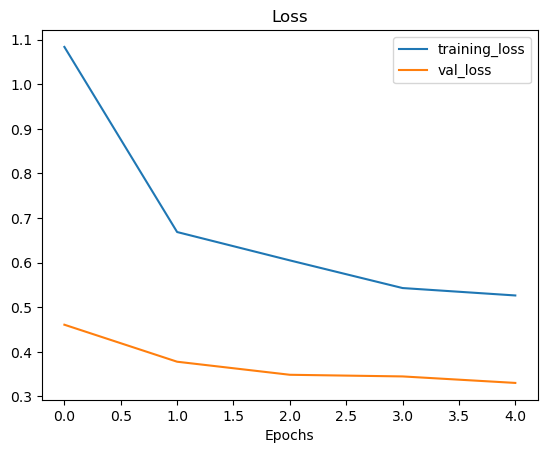

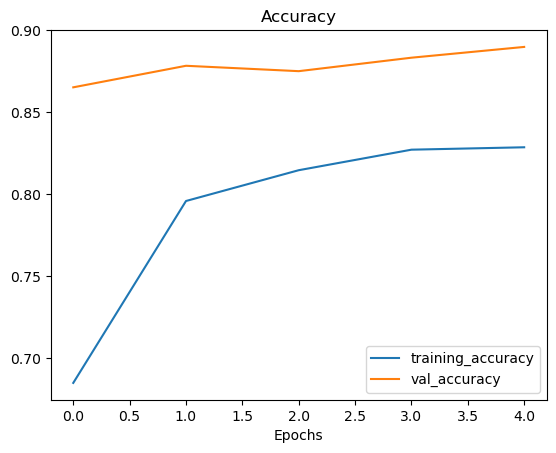

In [52]:
plot_loss_curves(model_4_history)

We will now unfreeze last 10 layers of the `base_model` 

In [53]:
base_model.trainable = True

In [54]:
for layer in base_model.layers[:-10]:
    layer.trainable = False 

In [55]:
model_4.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # for scaling reduce th lr by 10x
               metrics=["accuracy"])

In [56]:
model_4_unfreeze_history = model_4.fit(train_datagen,
                              epochs=5,
                              steps_per_epoch=len(train_datagen),
                              validation_data=test_datagen,
                              validation_steps=int(len(test_datagen) * 0.25),
                              callbacks=[create_tensorboard_callback("transfer_learning", "full_data_augment_unfrezee")])

Saving TensorBoard log files to: transfer_learning/full_data_augment_unfrezee/20230608-103146
Epoch 1/5
235/235 [==============================] - 33s 93ms/step - loss: 0.4881 - accuracy: 0.8429 - val_loss: 0.3007 - val_accuracy: 0.8947
Epoch 2/5
235/235 [==============================] - 20s 84ms/step - loss: 0.4478 - accuracy: 0.8523 - val_loss: 0.2882 - val_accuracy: 0.9062
Epoch 3/5
235/235 [==============================] - 19s 81ms/step - loss: 0.4256 - accuracy: 0.8588 - val_loss: 0.2873 - val_accuracy: 0.9046
Epoch 4/5
235/235 [==============================] - 20s 83ms/step - loss: 0.4029 - accuracy: 0.8635 - val_loss: 0.2667 - val_accuracy: 0.9095
Epoch 5/5
235/235 [==============================] - 19s 81ms/step - loss: 0.3823 - accuracy: 0.8743 - val_loss: 0.3115 - val_accuracy: 0.8964


In [57]:
model_4.evaluate(test_datagen)

79/79 [==============================] - 5s 60ms/step - loss: 0.2637 - accuracy: 0.9116


[0.2637401223182678, 0.9115999937057495]

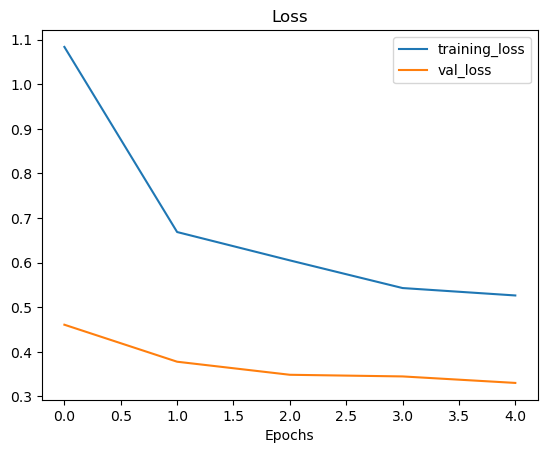

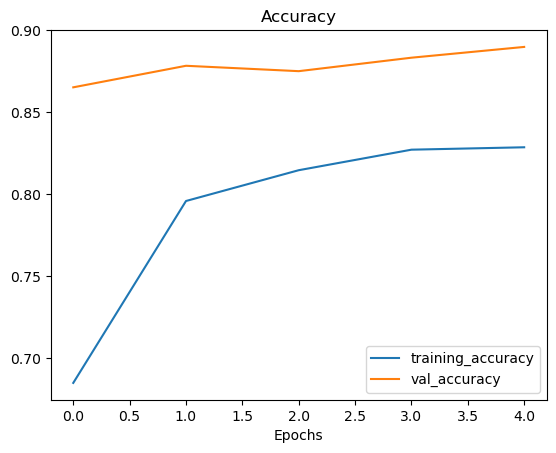

In [58]:
plot_loss_curves(model_4_history)

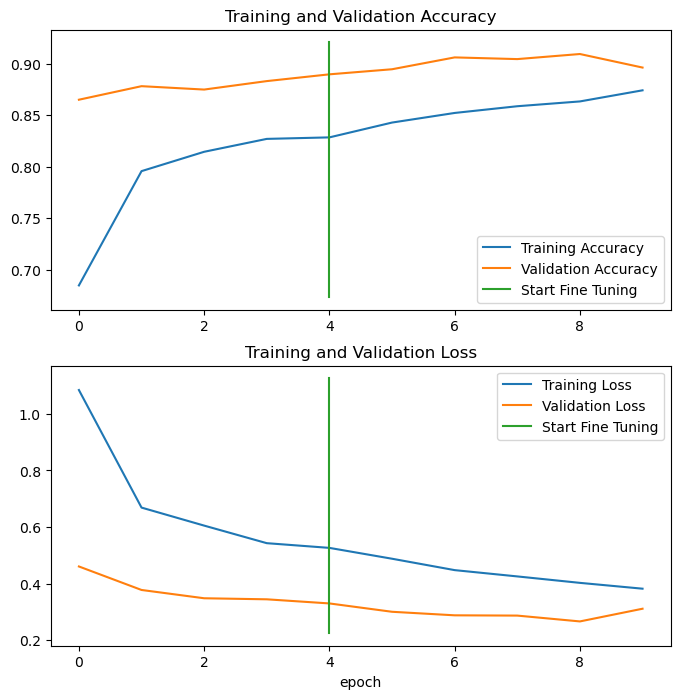

In [62]:
compare_historys(model_4_history, model_4_unfreeze_history)